In [1]:
# bibliotecas utilizadas
import cv2
import zipfile
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

#### Funções que serão utilizadas no decorrer do programa

In [3]:
# Esta função mostra na tela 16 eigenfaces
def show_eigenfaces(pca, faces):
    faceshape = list(faces.values())[0].shape
    n_comp = 50
    eigenfaces = pca.components_[:n_comp]

    fig, axes = plt.subplots(4, 4, sharex=True, sharey=True, figsize=(8, 10))
    for i in range(16):
        axes[i % 4][i//4].imshow(eigenfaces[i].reshape(faceshape), cmap="gray")
    print("Eigenfaces")
    plt.show()
    return eigenfaces


In [4]:
# a ideia desta função é separar o conjunto de teste e o que será decomposto com PCA
def filter_eigenfaces(faces):
    eigenfaces_matrix = []
    eigenfaces_labels = []

    for key, val in faces.items():
        # separa-se como conjunto de teste toda a classe 40 de fotos e a foto s39/10
        if key.startswith("s40/") or key == "s39/10.pgm":
            continue
        eigenfaces_matrix.append(val.flatten())
        eigenfaces_labels.append(key.split("/")[0])
       
    eigenfaces_matrix = np.array(eigenfaces_matrix)
    return eigenfaces_matrix, eigenfaces_labels

In [5]:
def totalClassesPics(faces, filename) -> None:  # totalizando qntd de pessoas e rostos
    classes = set(filename.split("/")[0] for filename in faces.keys())
    print("Number of classes:", len(classes))
    print("Number of faces:", len(faces))

In [6]:
def findPixelImg(faces) -> None: # encontrando o pixel de uma imagem especifica
    faceshape = list(faces.values())[0].shape
    print("Face image shape:", faceshape)
    print("Image:", list(faces.keys())[0])

In [7]:
def pltFaces(faces) -> None:  # exibe imagens
    fig, axes = plt.subplots(4, 4, sharex=True, sharey=True, figsize=(8, 10))
    faceimgs = list(faces.values())[-16:]  # guarda as ultimas 16 imagens

    for i in range(len(faceimgs)):
        axes[i % 4][i//4].imshow(faceimgs[i], cmap="gray")
    plt.show()


#### Código do trabalho de Eigenfaces

##### Printando as faces antes do tratamento

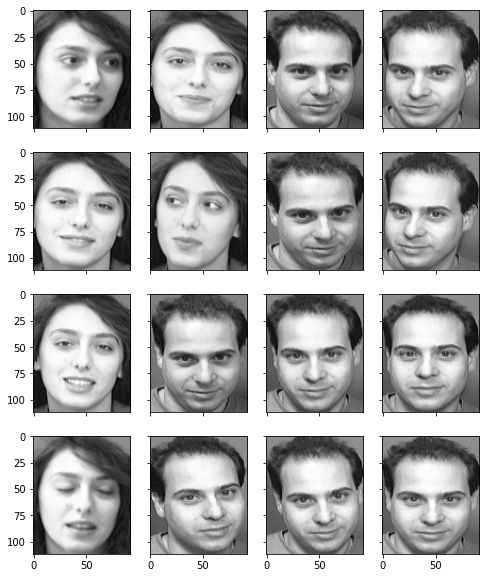

Face image shape: (112, 92)
Image: s1/1.pgm
Number of classes: 40
Number of faces: 400


In [9]:
faces = {}  # dicionario com as imagens
    
# abrindo o zipfile c as imagens
with zipfile.ZipFile("../dataset/attface.zip") as facezip:
    for filename in facezip.namelist():
        if not filename.endswith(".pgm"):
            continue  # nao eh uma imagem
        with facezip.open(filename) as img:  # extracao da imagem
            faces[filename] = cv2.imdecode(np.frombuffer(
                img.read(), np.uint8), cv2.IMREAD_GRAYSCALE)
pltFaces(faces)
findPixelImg(faces)
totalClassesPics(faces,filename)


##### Aplicando o PCA

Aplicando o PCA, podemos obter a matriz de covariância, e aí com ela, obtemos os autovetores e autovalores, que seriam os principais componentes.
Aí com a redução de dimensionalidade proveniente dessa análise, perdemos informação, mas em troca disso, permite extrair trechos com mais informação das imagens, por conta de que os autovalores dessa matriz diagonal são as variâncias das novas coordenadas. 
(falta coisa ainda mas acho q to entendendo)

Eigenfaces


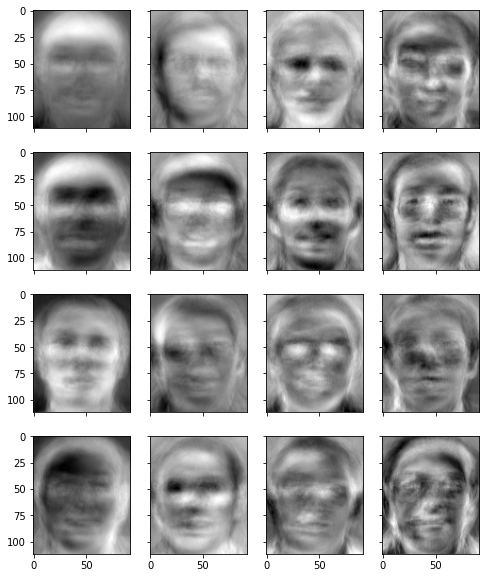

In [11]:
facematrix, facelabels = filter_eigenfaces(faces)
# Aqui utiliza-se o PCA para redução de dimensionalidade
pca = PCA().fit(facematrix)

eigenfaces = show_eigenfaces(pca, faces)

In [2]:
# Função que printa a img "buscada" e img correspondente pelo eigenface
def test(faces, pca, eigenfaces, weights, facematrix):
    faceshape = list(faces.values())[0].shape

    query = faces["s39/10.pgm"].reshape(1,-1)
    query_weight = eigenfaces @ (query - pca.mean_).T
    euclidean_distance = np.linalg.norm(weights - query_weight, axis = 0)
    best_match = np.argmin(euclidean_distance)
    print("Best Match")
    
    fig, axes = plt.subplots(1,2,sharex=True,sharey=True,figsize=(8,6))
    axes[0].imshow(query.reshape(faceshape), cmap="gray")
    axes[0].set_title("Query")
    axes[1].imshow(facematrix[best_match].reshape(faceshape), cmap="gray")
    axes[1].set_title("Best match")
    plt.show()


Best Match


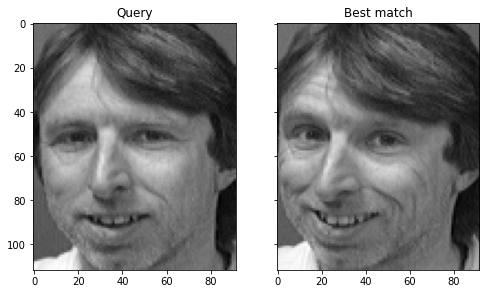

In [12]:
# pega-se os vetores de pesos 
weights = eigenfaces @ (facematrix - pca.mean_).T

test(faces, pca, eigenfaces, weights, facematrix)